# Atention: This notebook has some interactive graphs generated with Tableau which won't be rendered in the static environment of github. You should either use https://nbviewer.jupyter.org/ or open locally on your computer.

In [1]:
import pandas as pd
pd.options.plotting.backend = 'plotly'
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#Recomended: Control dpi
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150

## EDA

Let's import the dataset 

In [5]:
df_original = pd.read_csv('data/campaigns.csv', index_col=0)
df_original.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
df_original.describe()

,age,balance,day,duration,campaign,pdays,previous
count,40690.000000,40690.000000,40690.000000,40690.000000,40690.000000,40690.000000,40690.000000
mean,40.905407,1359.697518,15.808405,258.243844,2.764586,40.059867,0.579405
std,10.604908,3034.248783,8.318281,257.577068,3.110158,100.078281,2.350664
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,74.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,451.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1423.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [4]:
%%html
<div class='tableauPlaceholder' id='viz1592923138313' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;T1&#47;T10_fourth-insights&#47;Dashboard1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='T10_fourth-insights&#47;Dashboard1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;T1&#47;T10_fourth-insights&#47;Dashboard1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1592923138313');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.minWidth='420px';vizElement.style.maxWidth='850px';vizElement.style.width='100%';vizElement.style.minHeight='687px';vizElement.style.maxHeight='887px';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.minWidth='420px';vizElement.style.maxWidth='850px';vizElement.style.width='100%';vizElement.style.minHeight='687px';vizElement.style.maxHeight='887px';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';} else { vizElement.style.width='100%';vizElement.style.height='1227px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

The graph above give us some first insights regarding the features in our dataset. One important detail we notice from these plot is that there's a clear class imbalance; around 90% of the clients did not accept the campaign and only 10 accepted. The jobs in general followed similar patterns for both clients who accepted and the one who did not accepted. However, we notice that clients who accepted the offer in general have more jobs in management while the ones who did not accept had blue collar positions.

We can observe that the married clients are less likely to accept the offer. On the other hand, single clients are more likely to accept. The education among clients who accepted and did not accept the offer is very similar with most of the clients in both groups having secondary education.

In [6]:
%%html
<div class='tableauPlaceholder' id='viz1592752157652' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;T1&#47;T10_first-insights&#47;Dashboard1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='T10_first-insights&#47;Dashboard1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;T1&#47;T10_first-insights&#47;Dashboard1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1592752157652');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.minWidth='420px';vizElement.style.maxWidth='650px';vizElement.style.width='100%';vizElement.style.minHeight='587px';vizElement.style.maxHeight='887px';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.minWidth='420px';vizElement.style.maxWidth='650px';vizElement.style.width='100%';vizElement.style.minHeight='587px';vizElement.style.maxHeight='887px';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';} else { vizElement.style.width='100%';vizElement.style.height='977px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

The age for both clients who accepted and did not accept the offer have similar pattern, with most of the clients between the age of 30 and 40. Regarding loan feature, we can notice that most of the people who have loans accepted the offer while people who do not have loan did not accept the offer. 

In [5]:
%%html
<div class='tableauPlaceholder' id='viz1592762388689' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;T1&#47;T10_second-insights&#47;Dashboard1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='T10_second-insights&#47;Dashboard1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;T1&#47;T10_second-insights&#47;Dashboard1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1592762388689');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.minWidth='420px';vizElement.style.maxWidth='850px';vizElement.style.width='100%';vizElement.style.minHeight='587px';vizElement.style.maxHeight='887px';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.minWidth='420px';vizElement.style.maxWidth='850px';vizElement.style.width='100%';vizElement.style.minHeight='587px';vizElement.style.maxHeight='887px';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';} else { vizElement.style.width='100%';vizElement.style.height='977px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

We can notice in the balance graph that in general the pattern is similar. However, for negative balance we observe that around 4% of the people who accepted had a negative balance, while almost 9% of the clients who did not accept had negative balance (more than double). This means that people who have negative balance are more likely to refuse the offer, which makes sense.

The outcome of the previous campaign shows us that most of the clients who accepted the offer previously, kept accepting in the current campaign. We can also verify that we have a peak in contacts between June and August. Most of the clients who accepted the current offer had, on average, more contacts on the previous campaign, while the ones who didn't accept had less contact in the previous campaign. 

In [6]:
%%html
<div class='tableauPlaceholder' id='viz1592769547992' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;T1&#47;T10_third-insights&#47;Dashboard1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='T10_third-insights&#47;Dashboard1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;T1&#47;T10_third-insights&#47;Dashboard1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1592769547992');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.minWidth='420px';vizElement.style.maxWidth='650px';vizElement.style.width='100%';vizElement.style.minHeight='587px';vizElement.style.maxHeight='887px';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.minWidth='420px';vizElement.style.maxWidth='650px';vizElement.style.width='100%';vizElement.style.minHeight='587px';vizElement.style.maxHeight='887px';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';} else { vizElement.style.width='100%';vizElement.style.height='777px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

We can verify that most of the people who accepted the offer (11%) have no credit default, while only 0.12% of the clients who accepted the offer have credit default. 

Regarding the duration of the call, we see that the longer the call, the more likely the client is going to accept the offer. This is a very important feature since we see a huge difference between the two group of clients. On average, clients who had a duration of more than 500s, were more likely to accept the offer. Furthermore, most of the clients who accepted the offer were contacted from an unknown type of device.

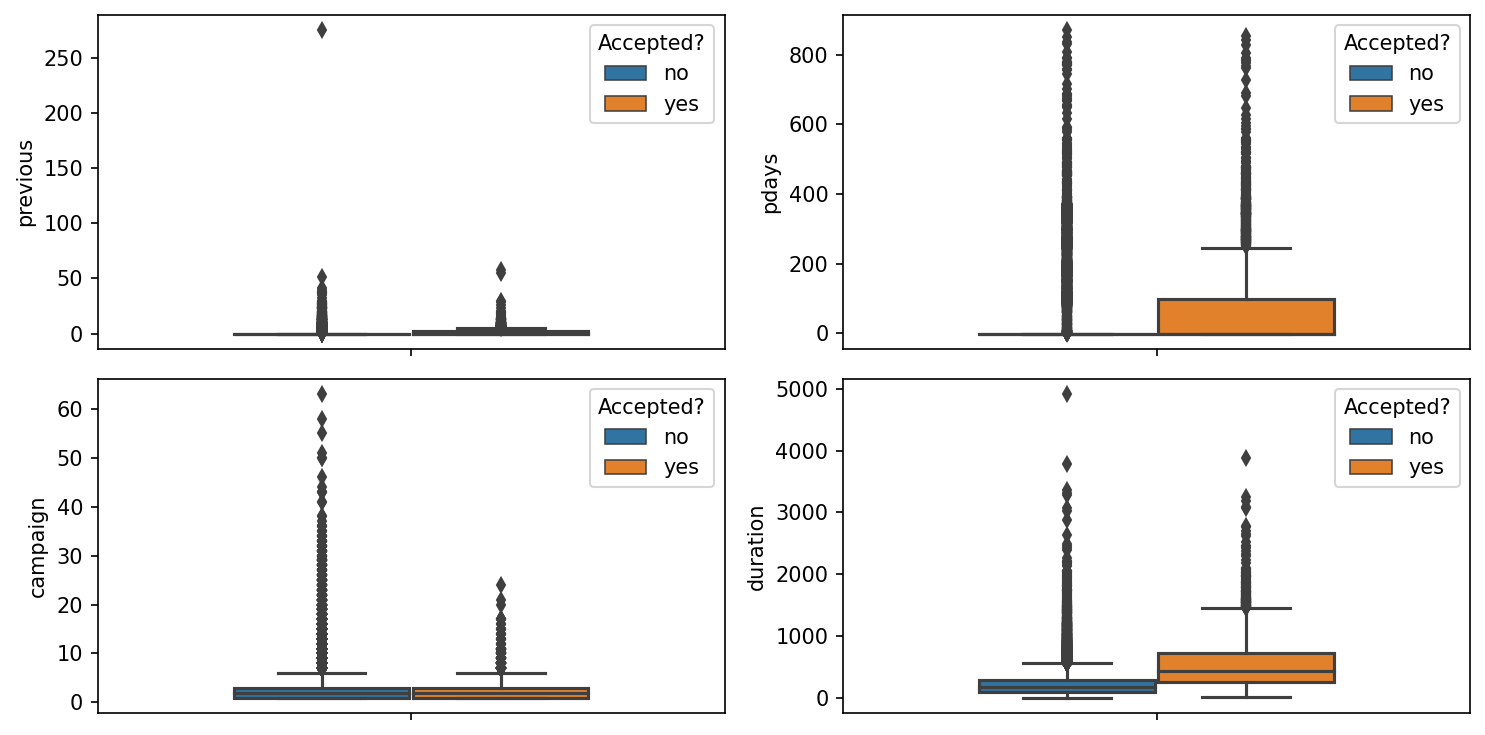

In [7]:
f, ax = plt.subplots(figsize=(10, 5))
plt.subplot(2, 2, 1)
ax1 = sns.boxplot(y='previous',
                  orient='v',
                  hue='y',
                  data=df_original,
                  x=[""] * len(df_original))
plt.subplot(2, 2, 2)
ax2 = sns.boxplot(y='pdays',
                  orient='v',
                  hue='y',
                  data=df_original,
                  x=[""] * len(df_original))
plt.subplot(2, 2, 3)
ax3 = sns.boxplot(y='campaign',
                  orient='v',
                  hue='y',
                  data=df_original,
                  x=[""] * len(df_original))
plt.subplot(2, 2, 4)
ax4 = sns.boxplot(y='duration',
                  orient='v',
                  hue='y',
                  data=df_original,
                  x=[""] * len(df_original))
# change legend title boxplots
new_title = 'Accepted?'
ax1.legend(title=new_title)
ax2.legend(title=new_title)
ax3.legend(title=new_title)
ax4.legend(title=new_title)
plt.tight_layout()
plt.show()

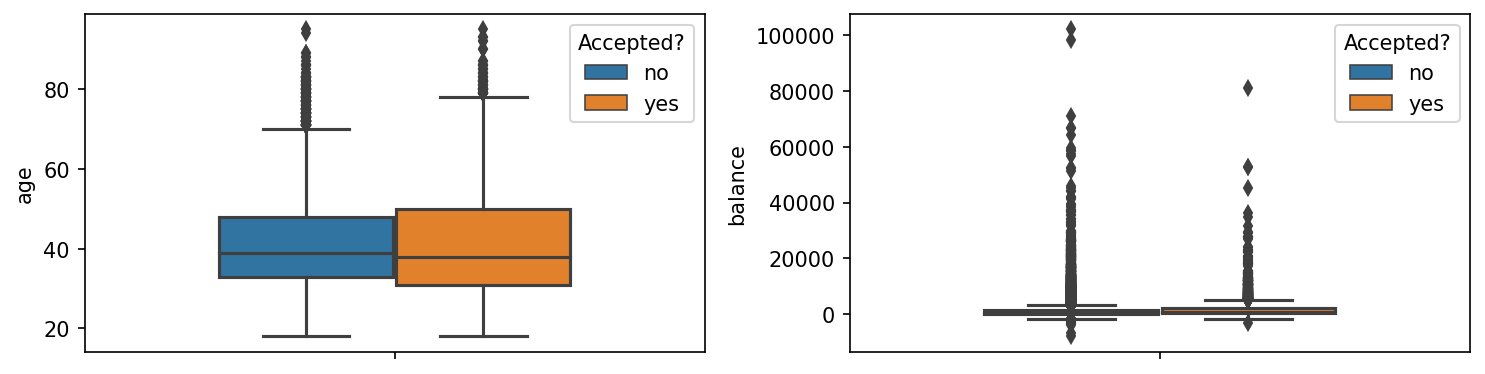

In [8]:
f, ax = plt.subplots(figsize=(10, 5))
plt.subplot(2, 2, 1)
ax1 = sns.boxplot(y='age',
                  orient='v',
                  hue='y',
                  data=df_original,
                  x=[""] * len(df_original))
plt.subplot(2, 2, 2)
ax2 = sns.boxplot(y='balance',
                  orient='v',
                  hue='y',
                  data=df_original,
                  x=[""] * len(df_original))
# change legend title boxplots
new_title = 'Accepted?'
ax1.legend(title=new_title)
ax2.legend(title=new_title)
plt.tight_layout()
plt.show()

Our features, in general, have some big outliers. This could be harmful for the model if not treated.

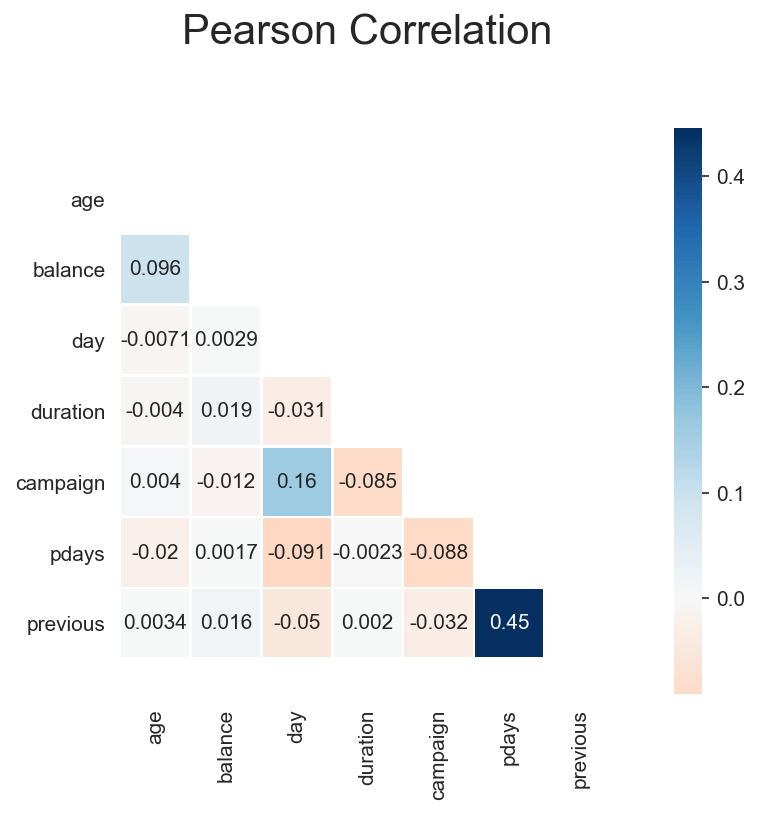

In [9]:
## check  correlations

df_mask = df_original.copy(
)  # if needed to apply a mask, just set df[df.Response == 1]
mask = np.zeros_like(df_mask.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.set_style('whitegrid')
plt.subplots(figsize=(10, 5))
sns.heatmap(
    df_mask.corr(),
    annot=True,
    mask=mask,
    cmap='RdBu',  ## in order to reverse the bar replace "RdBu" with "RdBu_r"
    linewidths=.8,
    linecolor='white',
    fmt='.2g',
    center=0,
    square=True)
plt.title("Pearson Correlation", y=1.03, fontsize=20, pad=40)

#workaround for boxes being cut
b, t = plt.ylim()  # discover the values for bottom and top
b += 0.5  # Add 0.5 to the bottom
t -= 0.5  # Subtract 0.5 from the top
plt.ylim(b, t)  # update the ylim(bottom, top) values
plt.show()

The pearson correlation didn't reveal new correlations for us. Another approach is analyzing with a different correlation method; we'll test Kendall Tau. In statistics, Kendall Tau is a statistic used to measure the ordinal association between two measured quantities. Kendall Tau is especially good to be used if our data is discrete. Let's convert some categorical features into numeric.

In [10]:
#binary
df_mask['y'] = df_mask['y'].apply(lambda x: 1 if x == 'yes' else 0)

#Define as cetegory some variables
df_mask["marital"] = df_mask["marital"].astype('category')
df_mask["education"] = df_mask["education"].astype('category')
df_mask["job"] = df_mask["job"].astype('category')
df_mask["contact"] = df_mask["contact"].astype('category')
df_mask["month"] = df_mask["month"].astype('category')
df_mask["poutcome"] = df_mask["poutcome"].astype('category')

#convert
df_mask["marital"] = df_mask["marital"].cat.codes
df_mask["education"] = df_mask["education"].cat.codes
df_mask["job"] = df_mask["job"].cat.codes
df_mask["contact"] = df_mask["contact"].cat.codes
df_mask["month"] = df_mask["month"].cat.codes
df_mask["poutcome"] = df_mask["poutcome"].cat.codes

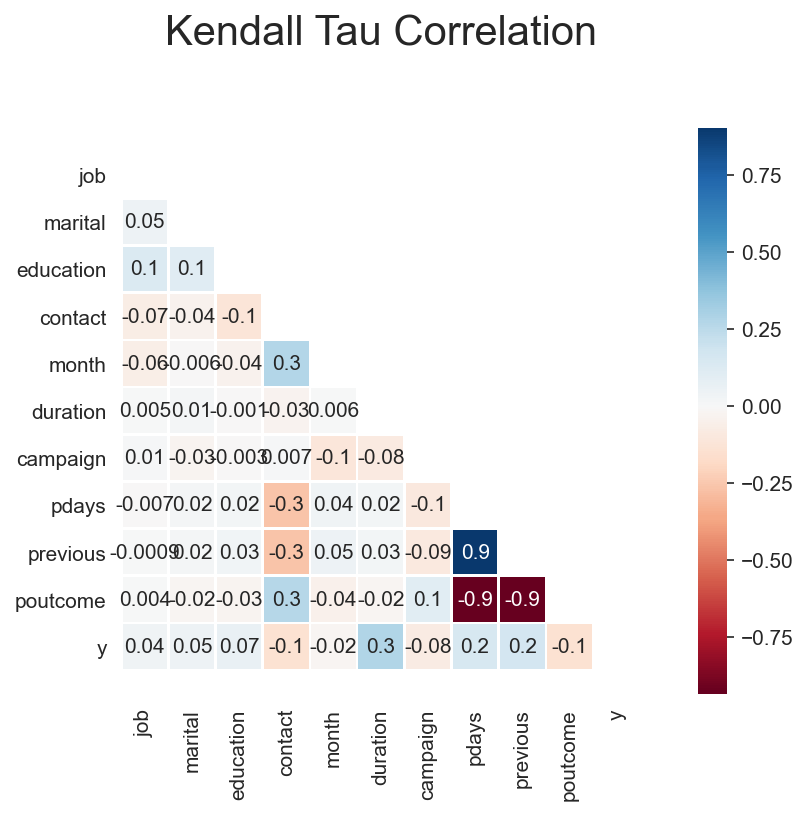

In [11]:
## check  correlations

df_mask = df_mask  # if needed to apply a mask, just set df[df.Response == 1]

mask = np.zeros_like(df_mask.drop(['age', 'balance', 'day'], axis=1).corr(),
                     dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.set_style('whitegrid')
plt.subplots(figsize=(10, 5))
sns.heatmap(
    df_mask.drop(['age', 'balance', 'day'], axis=1).corr('kendall'),
    annot=True,
    mask=mask,
    cmap='RdBu',  ## in order to reverse the bar replace "RdBu" with "RdBu_r"
    linewidths=.8,
    linecolor='white',
    fmt='.1g',
    center=0,
    square=True)
plt.title("Kendall Tau Correlation", y=1.03, fontsize=20, pad=40)

#workaround for boxes being cut
b, t = plt.ylim()  # discover the values for bottom and top
b += 0.5  # Add 0.5 to the bottom
t -= 0.5  # Subtract 0.5 from the top
plt.ylim(b, t)  # update the ylim(bottom, top) values
plt.show()

## Data Cleaning

Let's verify if there's outliers in our data 

In [12]:
df = df_original.copy() #create copy of dataframe for cleaning
pd.DataFrame(df.isna().mean().round(4) * 100)

,0
age,0.0
job,0.0
marital,0.0
education,0.0
default,0.0
balance,0.0
housing,0.0
loan,0.0
contact,0.0
day,0.0


Our dataset is has no missing data. Now let's take a quick look on the some feature where there might be some outliers. 

0.1 percentile for previous is 0.0
99.9 percentile for previous is 23.0

0.1 percentile for duration is 5.0
99.9 percentile for duration is 2080.7990000000136

0.1 percentile for balance is -1490.933
99.9 percentile for balance is 32948.0

0.1 percentile for campaign is 1.0
99.9 percentile for campaign is 32.0



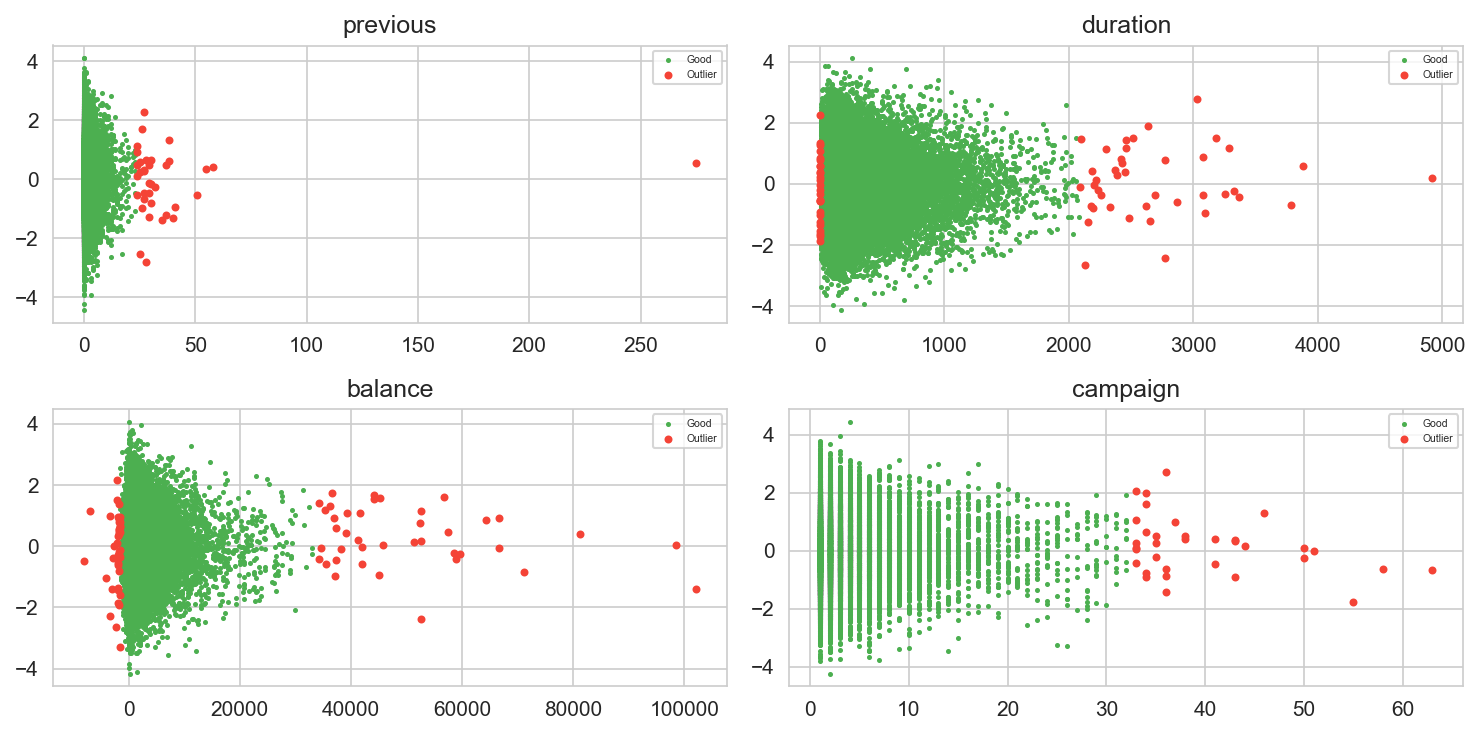

In [13]:
cols = ['previous', 'duration', 'balance', 'campaign']
f, ax = plt.subplots(figsize=(10, 5))

for c, col in enumerate(cols, 1):

    d1 = df['%s' % col]

    q1 = d1.quantile(.001)
    q3 = d1.quantile(.999)
    good = d1.between(q1, q3, inclusive=True)
    print('0.1 percentile for ' + str(col) + ' is ' + str(q1))
    print('99.9 percentile for ' + str(col) + ' is ' + str(q3))
    print('')

    plt.subplot(2, 2, c)
    visual_scatter = np.random.normal(size=d1.size)
    plt.scatter(d1[good],
                visual_scatter[good],
                s=2,
                label="Good",
                color="#4CAF50")
    plt.scatter(d1[~good],
                visual_scatter[~good],
                s=8,
                label="Outlier",
                color="#F44336")
    plt.title(col)
    plt.legend(prop={'size': 5})
plt.tight_layout()

As we can see, our dataset has some extreme outliers. Although we can clearly see these outliers, we don't want to remove something that is true from our dataset. However, the features ```previous``` has 1 outlier that could be artificial. We will remove it and fill with the median, so we will not distort our feature. 

In [14]:
df['previous'] = df['previous'].mask(df['previous'] > 200)
df['previous'] = df['previous'].fillna(df['previous'].median())

0.1 percentile for previous is 0.0
99.9 percentile for previous is 23.0



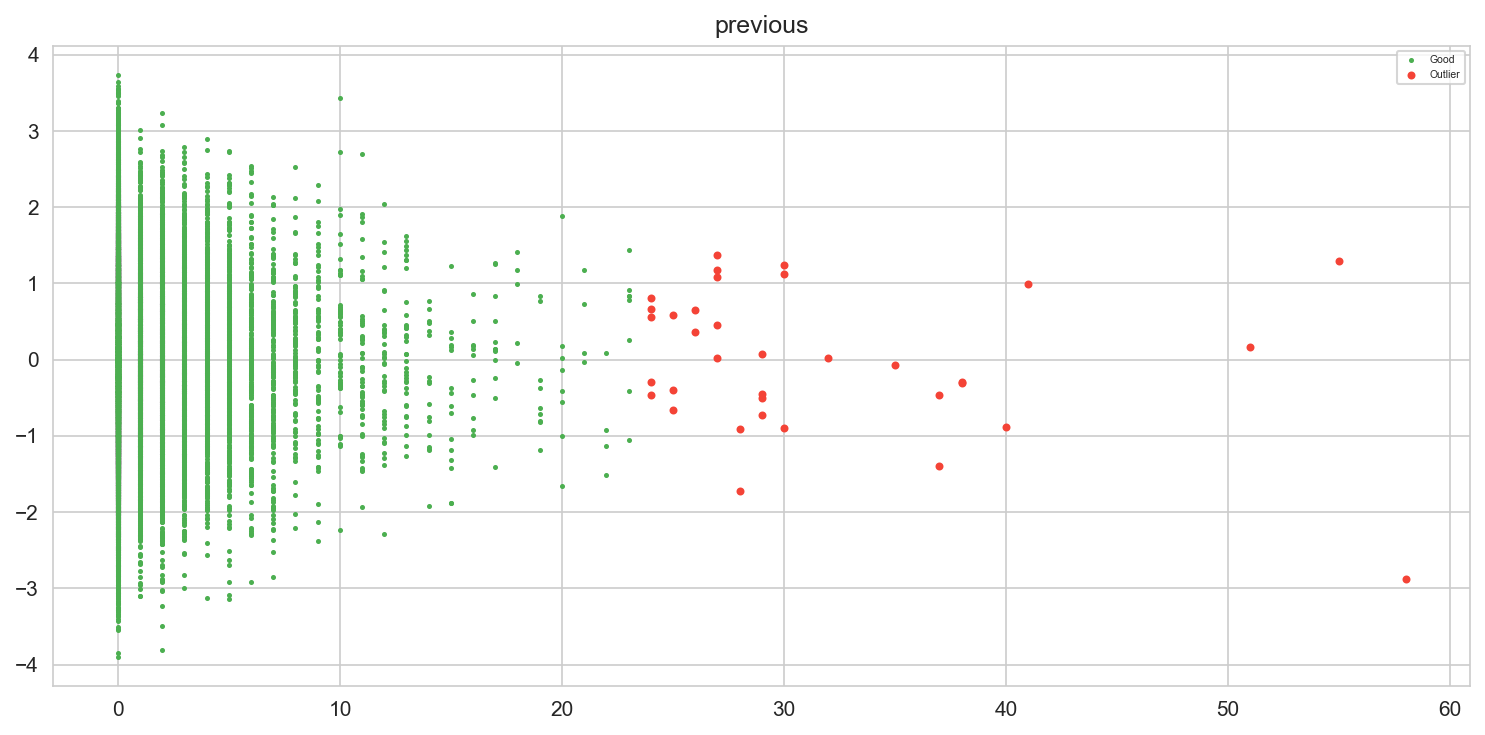

In [15]:
cols = ['previous']
f, ax = plt.subplots(figsize=(10, 5))

for c, col in enumerate(cols, 1):

    d1 = df['%s' % col]

    q1 = d1.quantile(.001)
    q3 = d1.quantile(.999)
    good = d1.between(q1, q3, inclusive=True)
    print('0.1 percentile for ' + str(col) + ' is ' + str(q1))
    print('99.9 percentile for ' + str(col) + ' is ' + str(q3))
    print('')

    plt.subplot(1, 1, c)
    visual_scatter = np.random.normal(size=d1.size)
    plt.scatter(d1[good],
                visual_scatter[good],
                s=2,
                label="Good",
                color="#4CAF50")
    plt.scatter(d1[~good],
                visual_scatter[~good],
                s=8,
                label="Outlier",
                color="#F44336")
    plt.title(col)
    plt.legend(prop={'size': 5})
plt.tight_layout()

Now it seems more realistic. 

## Feature Engineering 

In this section, we will apply the knowledge we learned from the EDA and create new features that describe well our dataset. We saw that calls longer than 500s are more likely to accept the offer on average. Let's create a feature that returns a binary describing whether the duration of the call was longer than 500s or not. 

In [16]:
df['has_long_call'] = df['duration'].apply(lambda x: 1 if x >= 500 else 0)

We also verified that clients with negative balance are less likely to accept the offer. Let's create a new feature that takes it into account.

In [17]:
df['has_neg_balance'] = df['balance'].apply(lambda x: 1 if x < 0 else 0)

## Output

In [18]:
df.to_csv('dataset_model.csv', index=False)